In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(5).fit_transform(X)
polynomial = LinearRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)
print('Допольнительные данные которые можно вывести:')
print(polynomial.score(poly,y))
print('COEF',polynomial.intercept_,polynomial.coef_)
print('MSE',np.sqrt(mean_squared_error(y,y_pred_poly)))
print('MAE',mean_absolute_error(y_pred_poly,y))

Допольнительные данные которые можно вывести:
0.743832454387495
COEF -12.07156440061176 [ 1.14554269e-08 -6.36843261e-09 -5.39058125e-11 ...  1.12163305e-08
 -4.11221016e-09 -1.32594643e-09]
MSE 0.5840376462451295
MAE 0.41892118418140994


In [1]:
from sklearn.datasets import fetch_california_housing, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
import numpy as np
import matplotlib.pyplot as plt

In [19]:
california_housing = fetch_california_housing()
X, y = california_housing.data, california_housing.target

In [20]:
models = {
    #"SVR (Linear)": SVR(kernel='linear'),
    #"SVR (RBF)": SVR(kernel='rbf'),
    #"SVR (Poly)": SVR(kernel='poly'),
    "K Nearest Neighbors": KNeighborsRegressor(),
    "Multilayer Perceptron": MLPRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Bagging": BaggingRegressor(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet": ElasticNet()
}

K Nearest Neighbors: MSE:0.7042321942059601 R2:0.4711185944964351


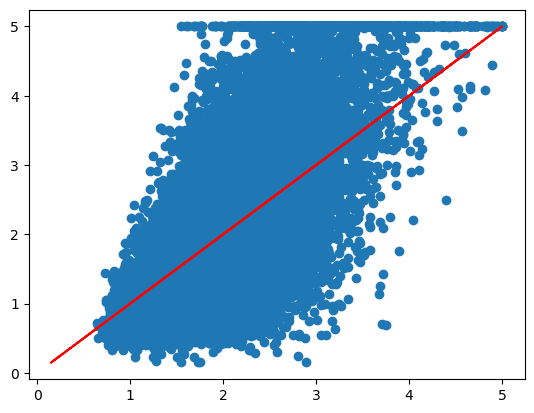

Multilayer Perceptron: MSE:0.8259222116123544 R2:0.3797288682510819


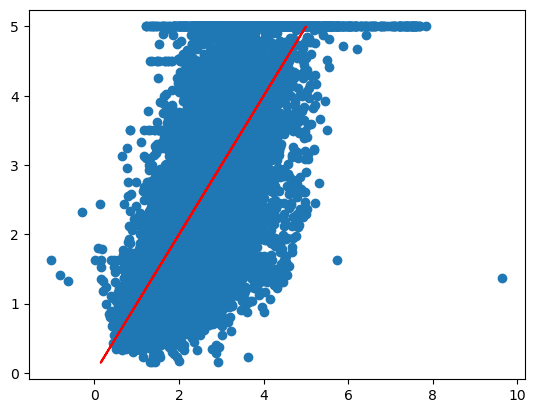

Decision Tree: MSE:9.570289276518477e-32 R2:1.0


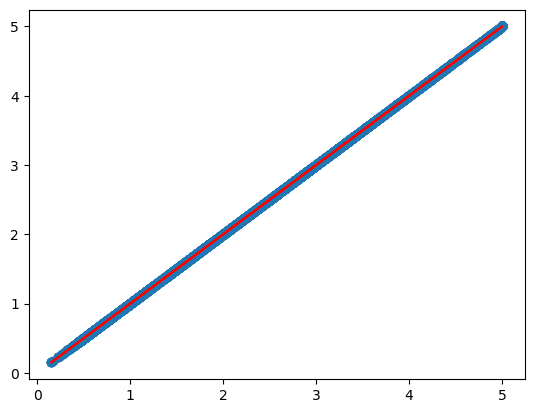

Random Forest: MSE:0.03465746878724384 R2:0.9739720919404137


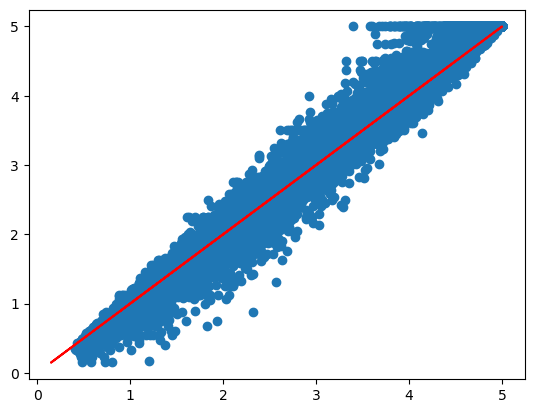

Bagging: MSE:0.04811397213922877 R2:0.9638662000704947


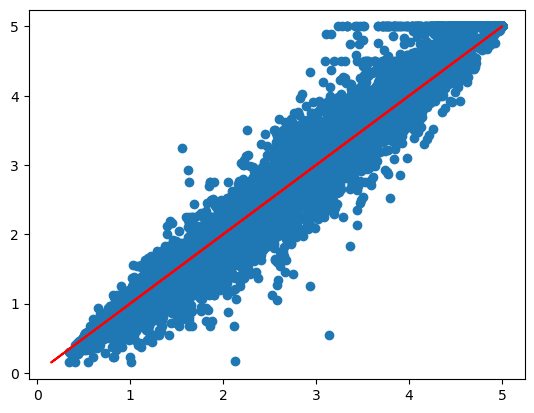

Ridge Regression: MSE:0.5243210214822194 R2:0.6062326586911465


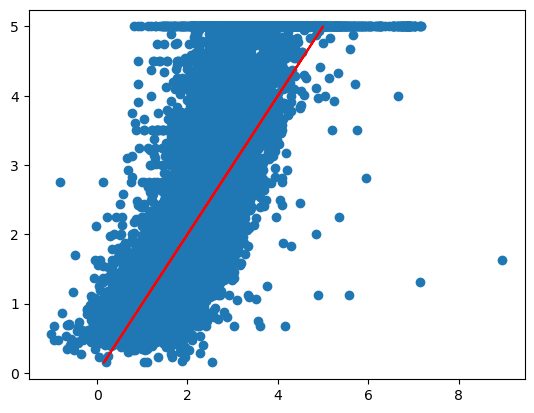

Lasso Regression: MSE:0.9517091796179765 R2:0.28526231449198314


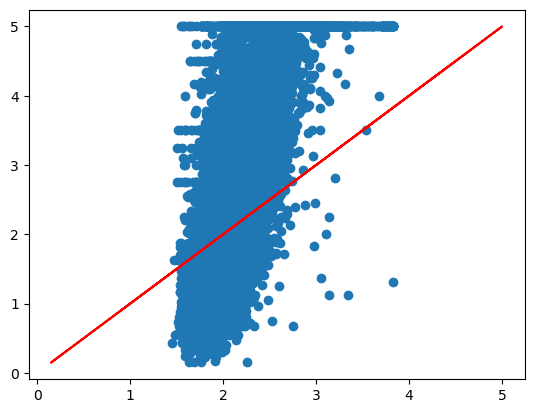

ElasticNet: MSE:0.7682209961692811 R2:0.4230627291195209


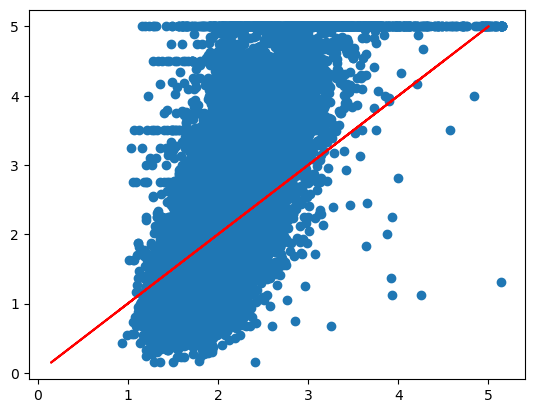

In [22]:
def evaluate(model,X,y):
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    return mse,r2,y_pred

r2s=[]
for name,model in models.items():
    mse,r2,y_pred=evaluate(model,X,y)
    res=f'{name}: MSE:{mse} R2:{r2}'
    print(res)
    plt.scatter(y_pred,y)
    plt.plot(y,y,color='r')
    plt.show()
    r2s.append({name:r2})

In [23]:
r2s

[{'K Nearest Neighbors': 0.4711185944964351},
 {'Multilayer Perceptron': 0.3797288682510819},
 {'Decision Tree': 1.0},
 {'Random Forest': 0.9739720919404137},
 {'Bagging': 0.9638662000704947},
 {'Ridge Regression': 0.6062326586911465},
 {'Lasso Regression': 0.28526231449198314},
 {'ElasticNet': 0.4230627291195209}]

K Nearest Neighbors: MSE:2342.55592760181 R2:0.604957605699507


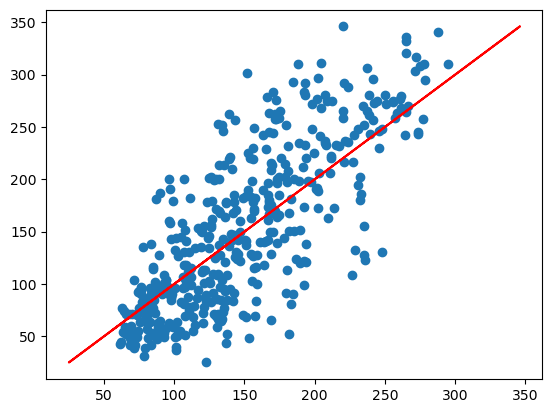

Multilayer Perceptron: MSE:20151.650666633166 R2:-2.3983207122844283


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


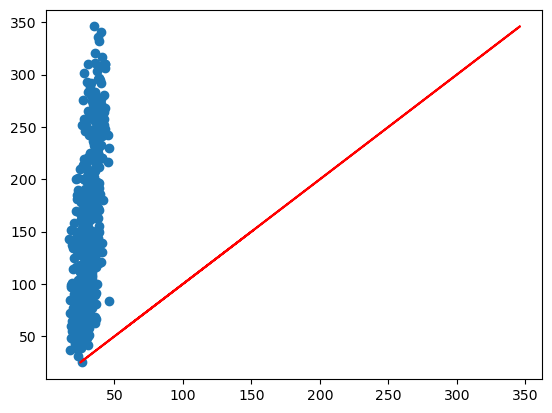

Decision Tree: MSE:0.0 R2:1.0


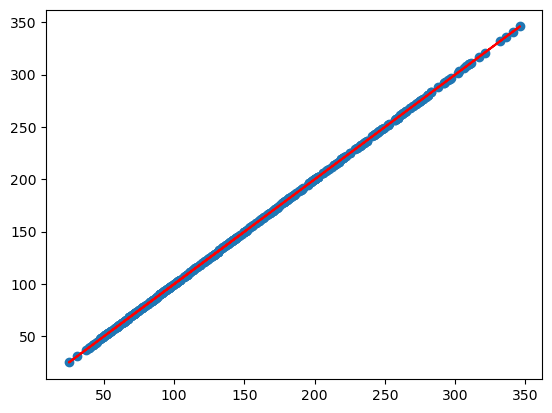

Random Forest: MSE:477.1477687782806 R2:0.9195350707352032


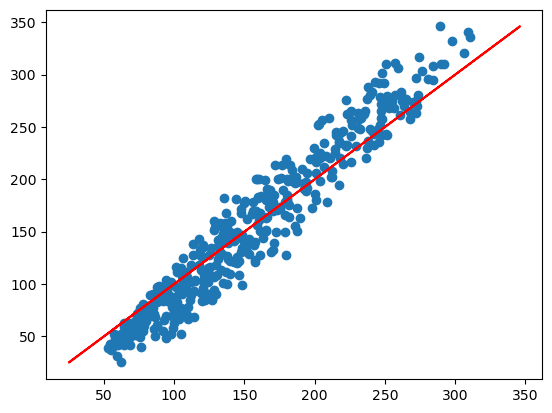

Bagging: MSE:548.5951357466064 R2:0.9074863770066703


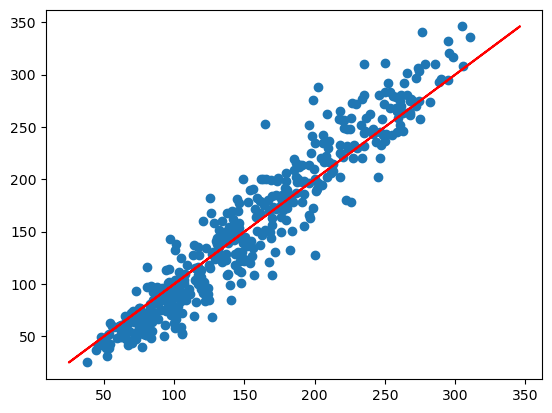

Ridge Regression: MSE:3254.1392124301146 R2:0.45123062774361744


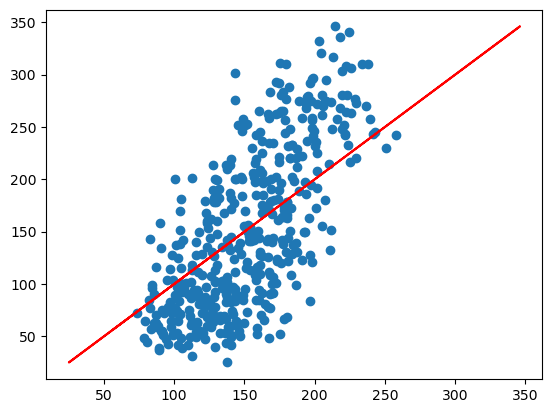

Lasso Regression: MSE:3810.6701145937627 R2:0.357378738231628


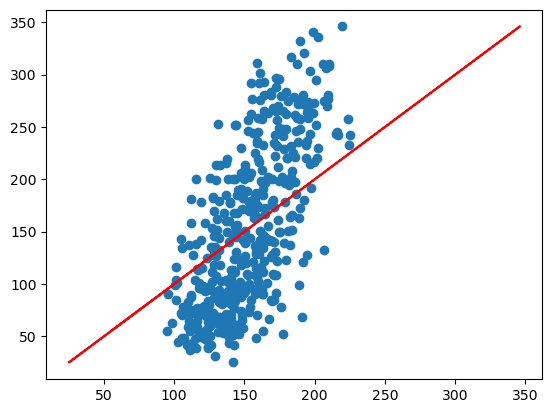

ElasticNet: MSE:5877.495852257372 R2:0.008834748998299613


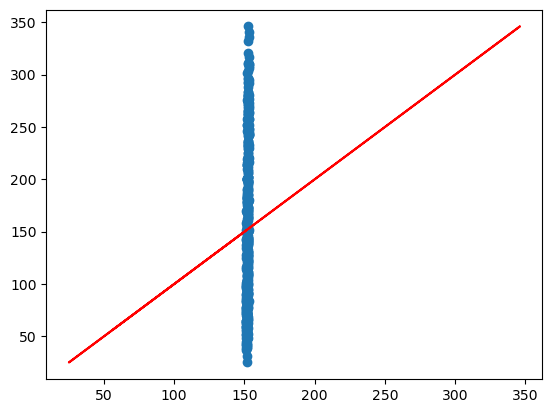

In [27]:
X, y = load_diabetes().data, load_diabetes().target
r2s=[]
for name,model in models.items():
    mse,r2,y_pred=evaluate(model,X,y)
    res=f'{name}: MSE:{mse} R2:{r2}'
    print(res)
    plt.scatter(y_pred,y)
    plt.plot(y,y,color='r')
    plt.show()
    r2s.append({name:r2})

In [29]:
r2s

[{'K Nearest Neighbors': 0.604957605699507},
 {'Multilayer Perceptron': -2.3983207122844283},
 {'Decision Tree': 1.0},
 {'Random Forest': 0.9195350707352032},
 {'Bagging': 0.9074863770066703},
 {'Ridge Regression': 0.45123062774361744},
 {'Lasso Regression': 0.357378738231628},
 {'ElasticNet': 0.008834748998299613}]